In [13]:
# import dependenices
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle


In [2]:
cali_df = pd.read_csv('cleaned_housing_data.csv')
cali_df.head()


,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity,avg_rooms_per_household,avg_bedrooms_per_household
0,-122.23,37.88,41.0,322.0,126.0,8.3252,764894.0,NEAR BAY,6.984127,1.023810
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,605865.0,NEAR BAY,6.238137,0.971880
2,-122.24,37.85,52.0,496.0,177.0,7.2574,595049.0,NEAR BAY,8.288136,1.073446
3,-122.25,37.85,52.0,558.0,219.0,5.6431,576797.0,NEAR BAY,5.817352,1.073059
4,-122.25,37.85,52.0,565.0,259.0,3.8462,578318.0,NEAR BAY,6.281853,1.081081


In [3]:
# Separate the features from the target.
X=cali_df.drop(columns=['median_house_value'])
y=cali_df['median_house_value']
y.shape
y


0        764894.0
1        605865.0
2        595049.0
3        576797.0
4        578318.0
           ...   
20635    131989.0
20636    130299.0
20637    155987.0
20638    143143.0
20639    151086.0
Name: median_house_value, Length: 20640, dtype: float64

In [4]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X,dtype=int)

In [5]:
X.head()

,longitude,latitude,housing_median_age,population,households,median_income,avg_rooms_per_household,avg_bedrooms_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,322.0,126.0,8.3252,6.984127,1.023810,0,0,0,1,0
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,6.238137,0.971880,0,0,0,1,0
2,-122.24,37.85,52.0,496.0,177.0,7.2574,8.288136,1.073446,0,0,0,1,0
3,-122.25,37.85,52.0,558.0,219.0,5.6431,5.817352,1.073059,0,0,0,1,0
4,-122.25,37.85,52.0,565.0,259.0,3.8462,6.281853,1.081081,0,0,0,1,0


In [6]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)


In [7]:
# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=40, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=40, random_state=42)

In [8]:
# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)


In [9]:
y_pred

array([ 82417.075  , 118177.475  , 777848.31475, ..., 825460.85375,
       122609.5    , 289425.175  ])

In [10]:
# print statistics 

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared Score:', r2_score(y_test, y_pred))


Mean Absolute Error: 54672.48987615068
Mean Squared Error: 7055315362.276794
R-squared Score: 0.8114892324874666


In [11]:
# Get the feature importance array
importances = rf_model.feature_importances_
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.48574943662432735, 'median_income'),
 (0.140474087055618, 'ocean_proximity_INLAND'),
 (0.09962220746515257, 'longitude'),
 (0.09132694310033891, 'latitude'),
 (0.04821212921334447, 'housing_median_age'),
 (0.035475779021893465, 'avg_rooms_per_household'),
 (0.03381979566049539, 'avg_bedrooms_per_household'),
 (0.029429379382410713, 'households'),
 (0.025365487245877862, 'population'),
 (0.0068743752297372234, 'ocean_proximity_NEAR OCEAN')]

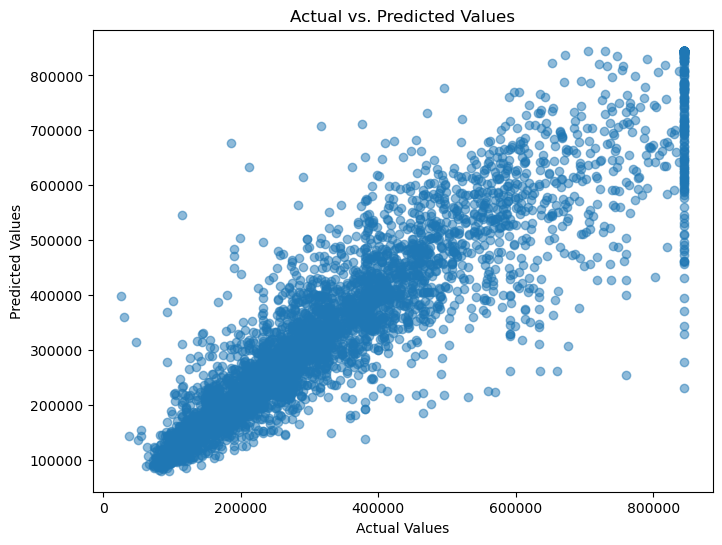

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [15]:
# testing with sample data
sample=pd.read_csv('./sample.csv')
sample_1=scaler.transform(sample)


FileNotFoundError: [Errno 2] No such file or directory: './sample.csv'

In [16]:
value=rf_model.predict(sample_1)
print('House value for the provided data is:',value[0])

NameError: name 'sample_1' is not defined

In [35]:


with open('rf_model.pkl', 'wb') as f: 
    pickle.dump(rf_model, f)